In [ ]:
from scipy.stats import chi2_contingency, mannwhitneyu, norm, t, ttest_ind
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.special import binom

In [ ]:
data = pd.read_csv("data.csv", header=0, names=["Players_A", "CostPerDay_A", "DayesPerWeek_A", "Promo_A","Players_B", "CostPerDay_B", "DayesPerWeek_B", "Promo_B"])
data_A = data[["Players_A", "CostPerDay_A", "DayesPerWeek_A", "Promo_A"]]
data_B = data[["Players_B", "CostPerDay_B", "DayesPerWeek_B", "Promo_B"]]
data_A.head()

,Players_A,CostPerDay_A,DayesPerWeek_A,Promo_A
0,player 1,£ 0.88,3,A
1,player 2,£ 0.92,5,A
2,player 3,£ 0.90,1,A
3,player 4,£ 0.57,7,A
4,player 5,£ 0.78,0,A


In [ ]:
costA = data[data["Promo_A"] == "A"]["CostPerDay_A"].str[2:].astype(float)

In [ ]:
costB = data[data["Promo_A"] == "B"]["CostPerDay_A"].str[2:].astype(float)

In [ ]:


def plot_pval(distribution, t_val, xlims=(-5, 5), ylims=(0, 0.5)):
    xxx = np.linspace(*xlims, 1000)
    f, ax = plt.subplots(figsize=(4,3))
    ax.plot(xxx, distribution.pdf(xxx))
    ax.set_ylim(ylims)
    ax.vlines(t_val, 0, stat_distrib.pdf(t_val), color='orange')
    ax.plot(t_val, stat_distrib.pdf(t_val), 'o', color='orange')
    xp = xxx <= t_val
    ax.fill_between(xxx[xp], xxx[xp] * 0, stat_distrib.pdf(xxx[xp]), color='r')
    xp = xxx >= -t_val
    ax.fill_between(xxx[xp], xxx[xp] * 0, stat_distrib.pdf(xxx[xp]), color='r')
    ax.set_ylabel("prob denisty")
    f.tight_layout()
    return f, ax



In [ ]:
np.sqrt(np.var(costA, ddof=1))

0.26785047068070394

- Student's t-test:
   - nu: 52.000
   - t value: 0.945
   - p-value: 165.1%


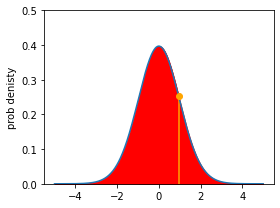

In [ ]:


# Sample variances (w. Bessel correction)
s_x = np.sqrt(np.var(costA, ddof=1))
s_y = np.sqrt(np.var(costB, ddof=1))
n_x = len(costA)
n_y = len(costB)
x = costA
y = costB
# Pooled variance
s_p = np.sqrt(((n_x-1) * s_x**2 +
               (n_y-1) * s_y**2)
              / (n_x + n_y - 2))

# Test statistic distribution under null hypothesis H0
dofs = n_x + n_y - 2
stat_distrib = t(df=dofs, loc=0, scale=1)

z_val = (x.mean() - y.mean()) / np.sqrt(s_x**2/n_x + s_y**2/n_y)
# t value
t_val = (costA.mean() - costB.mean()) / (s_p * np.sqrt(1/n_x + 1/n_y))

# p-value
p_val = stat_distrib.cdf(t_val) * 2

print("- Student's t-test:")
print(f"   - nu: {dofs:.3f}")
print(f"   - t value: {t_val:.3f}")
print(f"   - p-value: {p_val*100:.1f}%")
plot_pval(stat_distrib, z_val);



- Welch' t-test:
   - nu: 50.958
   - t value: 0.945
   - p-value: 165.1%


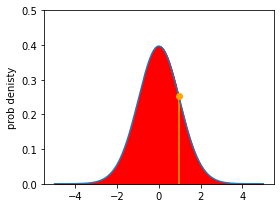

In [ ]:
# Sample variances (w. Bessel correction)
s_x = np.sqrt(np.var(x, ddof=1))
s_y = np.sqrt(np.var(y, ddof=1))

# Denominator (not a pooled variance!)
s_d = np.sqrt(s_x**2/n_x + s_y**2/n_y)
    
    
# Test statistic distribution under null hypothesis H0
dofs = s_d**4 / ((s_x**2/n_x)**2/(n_x-1) +
                 (s_y**2/n_y)**2/(n_y-1))
stat_distrib = t(df=dofs, loc=0, scale=1)

# t value
t_val = (x.mean() - y.mean()) / s_d

# p-value
p_val = stat_distrib.cdf(t_val) * 2

print("- Welch' t-test:")
print(f"   - nu: {dofs:.3f}")
print(f"   - t value: {t_val:.3f}")
print(f"   - p-value: {p_val*100:.1f}%")
plot_pval(stat_distrib, z_val);


In [ ]:
costA

0     0.88
1     0.92
2     0.90
3     0.57
4     0.78
5     0.25
6     0.07
7     0.33
8     0.32
9     0.50
10    0.19
11    0.74
12    0.90
13    0.40
14    0.24
15    0.58
16    0.86
17    0.50
18    0.81
19    0.28
20    0.72
21    0.65
22    0.66
23    0.30
24    0.25
25    0.37
26    0.92
Name: CostPerDay_A, dtype: float64

In [ ]:
costB

27    0.79
28    0.98
29    0.71
30    0.50
31    0.41
32    0.33
33    0.33
34    0.72
35    0.66
36    0.09
37    0.25
38    0.19
39    0.01
40    0.91
41    0.75
42    0.48
43    0.08
44    0.13
45    0.87
46    0.98
47    0.26
48    0.03
49    0.36
50    0.84
51    0.50
52    0.55
53    0.17
Name: CostPerDay_A, dtype: float64

In [ ]:
mwu = mannwhitneyu(x, y, use_continuity=False, alternative="two-sided")

print("- Mann-Whitney U test:")
print(f"   - U value: {mwu.statistic:.3f}")
print(f"   - p-value: {mwu.pvalue*100:.1f}%")


- Mann-Whitney U test:
   - U value: 417.500
   - p-value: 35.9%


In [ ]:
mwu = mannwhitneyu(y, x, use_continuity=False, alternative="two-sided")

print("- Mann-Whitney U test:")
print(f"   - U value: {mwu.statistic:.3f}")
print(f"   - p-value: {mwu.pvalue*100:.1f}%")


- Mann-Whitney U test:
   - U value: 311.500
   - p-value: 35.9%


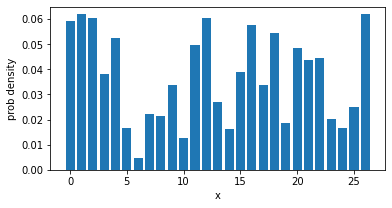

In [ ]:
p = costA
a = np.arange(len(p))
p = p / p.sum()

f, ax = plt.subplots(figsize=(6, 3))
ax.bar(a, p)
ax.set_ylabel("prob density")
ax.set_xlabel("x");

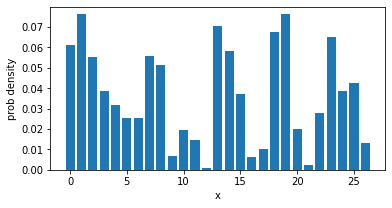

In [ ]:
p = costB
a = np.arange(len(p))
p = p / p.sum()

f, ax = plt.subplots(figsize=(6, 3))
ax.bar(a, p)
ax.set_ylabel("prob density")
ax.set_xlabel("x");

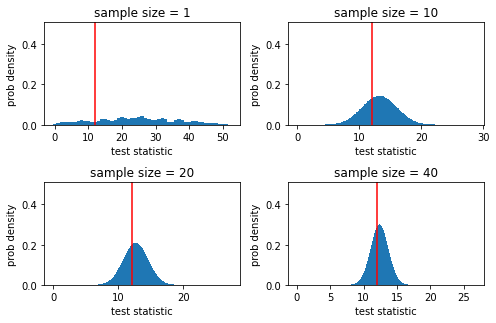

In [ ]:
loc = (p*np.arange(len(p))).sum()

nn = [1, 10, 20, 40]
f, axx = plt.subplots(2, 2, figsize=(3.5*2, 2.3*2))    

for i, n in enumerate(nn):
    r, c = divmod(i, 2)        
    x = p
    ax = axx[r, c]
    for _ in range(n):
        x = np.convolve(x, p)

    ax.bar(np.arange(len(x))/n, x*n, width=1/n)
    ax.set_ylim([0, 0.51])
    ax.vlines(loc, 0, 0.51, 'r')
    ax.set_xlabel("test statistic")
    ax.set_ylabel("prob density")
    ax.set_title(f"sample size = {n}")

f.tight_layout()

In [ ]:
costA = data[data["Promo_B"] == "A"]["CostPerDay_B"].str[2:].astype(float)

In [ ]:
costB = data[data["Promo_B"] == "B"]["CostPerDay_B"].str[2:].astype(float)

- Student's t-test:
   - nu: 52.000
   - t value: 0.000
   - p-value: 100.0%


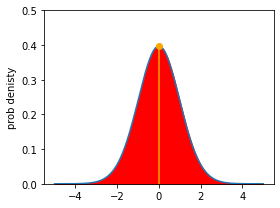

In [ ]:


# Sample variances (w. Bessel correction)
s_x = np.sqrt(np.var(costA, ddof=1))
s_y = np.sqrt(np.var(costB, ddof=1))
n_x = len(costA)
n_y = len(costB)
x = costA
y = costB
# Pooled variance
s_p = np.sqrt(((n_x-1) * s_x**2 +
               (n_y-1) * s_y**2)
              / (n_x + n_y - 2))

# Test statistic distribution under null hypothesis H0
dofs = n_x + n_y - 2
stat_distrib = t(df=dofs, loc=0, scale=1)

z_val = (x.mean() - y.mean()) / np.sqrt(s_x**2/n_x + s_y**2/n_y)
# t value
t_val = (costA.mean() - costB.mean()) / (s_p * np.sqrt(1/n_x + 1/n_y))

# p-value
p_val = stat_distrib.cdf(t_val) * 2

print("- Student's t-test:")
print(f"   - nu: {dofs:.3f}")
print(f"   - t value: {t_val:.3f}")
print(f"   - p-value: {p_val*100:.1f}%")
plot_pval(stat_distrib, z_val);



- Welch' t-test:
   - nu: 52.000
   - t value: 0.000
   - p-value: 100.0%


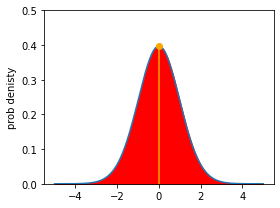

In [ ]:
# Sample variances (w. Bessel correction)
s_x = np.sqrt(np.var(x, ddof=1))
s_y = np.sqrt(np.var(y, ddof=1))

# Denominator (not a pooled variance!)
s_d = np.sqrt(s_x**2/n_x + s_y**2/n_y)
    
    
# Test statistic distribution under null hypothesis H0
dofs = s_d**4 / ((s_x**2/n_x)**2/(n_x-1) +
                 (s_y**2/n_y)**2/(n_y-1))
stat_distrib = t(df=dofs, loc=0, scale=1)

# t value
t_val = (x.mean() - y.mean()) / s_d

# p-value
p_val = stat_distrib.cdf(t_val) * 2

print("- Welch' t-test:")
print(f"   - nu: {dofs:.3f}")
print(f"   - t value: {t_val:.3f}")
print(f"   - p-value: {p_val*100:.1f}%")
plot_pval(stat_distrib, z_val);


In [ ]:
mwu = mannwhitneyu(x, y, use_continuity=False, alternative="two-sided")

print("- Mann-Whitney U test:")
print(f"   - U value: {mwu.statistic:.3f}")
print(f"   - p-value: {mwu.pvalue*100:.1f}%")


- Mann-Whitney U test:
   - U value: 364.500
   - p-value: 100.0%


In [ ]:
mwu = mannwhitneyu(y, x, use_continuity=False, alternative="two-sided")

print("- Mann-Whitney U test:")
print(f"   - U value: {mwu.statistic:.3f}")
print(f"   - p-value: {mwu.pvalue*100:.1f}%")


- Mann-Whitney U test:
   - U value: 364.500
   - p-value: 100.0%
